In [35]:
import numpy as np

#   Perceptron Algorithm Implementation

In [36]:
def perceptron_alg(x,y,r=0.1,epochs=1):
    #w=np.zeros(x.shape[1])
    w=np.random.randn(x.shape[1])
    b=0.5
    for epoch in range(epochs):
        for j in range(len(x)):
            f=np.dot(w,x[j])+b
            g=1 if f>=0 else 0
            error=y[j]-g
            w+=(r*error*x[j])
            b+=(r*error)
    return w,b
x=np.array([[3,2,1],[1,1,1],[1,2,3]])
y=np.array([0,1,1])

In [37]:
perceptron_alg(x,y)

(array([-0.51967189,  0.15711257,  1.37789404]), 0.4)

# Generation of a non lineary separablel data (XOR)

In [38]:
np.random.seed(42)
num_samples = 50
x_xor = np.random.rand(num_samples, 2)

In [39]:
x_xor

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [40]:
y_xor = np.logical_xor(x_xor[:, 0] > 0.5, x_xor[:, 1] > 0.5).astype(int)
#generation of y

In [41]:
y_xor

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0])

In [42]:
w,b = perceptron_alg(x_xor,y_xor,epochs=100)

In [43]:
import matplotlib.pyplot as plt 

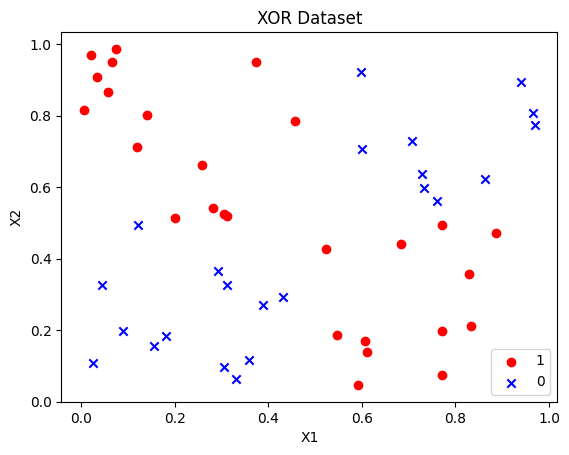

In [44]:
# Plot the XOR dataset
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c='red', marker='o', label='1')
plt.scatter(x_xor[y_xor == 0, 0], x_xor[y_xor == 0, 1], c='blue', marker='x', label='0')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Dataset')
plt.legend()
plt.show()



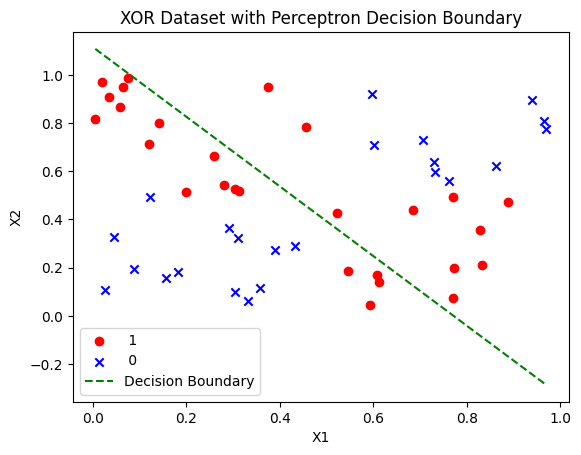

In [45]:
# Plot the XOR dataset
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c='red', marker='o', label=' 1')
plt.scatter(x_xor[y_xor == 0, 0], x_xor[y_xor == 0, 1], c='blue', marker='x', label=' 0')

# Plot the decision boundary
x_decision_boundary = np.linspace(x_xor[:, 0].min(), x_xor[:, 0].max(), 100)
y_decision_boundary = (-w[0] * x_decision_boundary - b) / w[1]
plt.plot(x_decision_boundary, y_decision_boundary, color='green', linestyle='dashed', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Dataset with Perceptron Decision Boundary')
plt.legend()
plt.show()

In [46]:
y_pred = np.where(np.dot(x_xor, w) + b >= 0, 1, 0)

In [47]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0])

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [49]:
conf_matrix = confusion_matrix(y_xor, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
#TN #FP
#FN #TP
#13 instances right predicted as 0
#11 instances right predicted  as 1
#10 instances li homa 0 but predicted as 1
#16 instancea li homa 1 but predicted as 0

Confusion Matrix:
[[13 10]
 [17 10]]


In [50]:
# Evaluation Metrics
accuracy = accuracy_score(y_xor, y_pred)
precision = precision_score(y_xor, y_pred)
recall = recall_score(y_xor, y_pred)
f1 = f1_score(y_xor, y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# here we have the False negative costly the recall is most relevant and it is low where is should be close to 1


Evaluation Metrics:
Accuracy: 0.46
Precision: 0.5
Recall: 0.37037037037037035
F1 Score: 0.425531914893617


# Adaline algorithm implementation

In [51]:
def adaline(x,y,r=0.1,epochs=20):
    w=np.zeros(x.shape[1])
    b=0.5
    for epoch in range(epochs):
        for j in range(len(x)):
            f=np.dot(x[j],w)+b #linear activation fct
            w -= r * np.dot((f-y[j]), x[j])
            b -= r * (f-y[j])
    return w,b    

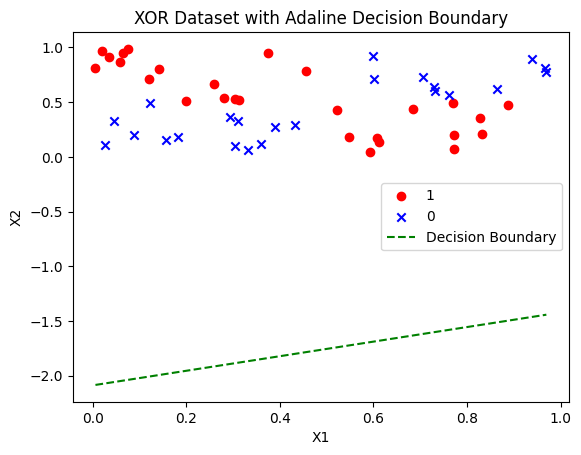

In [52]:
w_ad, b_ad = adaline(x_xor, y_xor, r=0.1, epochs=100)

# Plot the XOR dataset
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c='red', marker='o', label='1')
plt.scatter(x_xor[y_xor == 0, 0], x_xor[y_xor == 0, 1], c='blue', marker='x', label='0')

# Plot the decision boundary
x_decision_boundary = np.linspace(x_xor[:, 0].min(), x_xor[:, 0].max(), 100)
y_decision_boundary = (-w_ad[0] * x_decision_boundary - b_ad) / w_ad[1]
plt.plot(x_decision_boundary, y_decision_boundary, color='green', linestyle='dashed', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Dataset with Adaline Decision Boundary')
plt.legend()
plt.show()


In [53]:
y_pred = np.where(np.dot(x_xor, w_ad) + b_ad >= 0, 1, 0)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [54]:
conf_matrix = confusion_matrix(y_xor, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
#TN #FP
#FN #TP

Confusion Matrix:
[[ 0 23]
 [ 0 27]]


In [55]:
# Evaluation Metrics
accuracy = accuracy_score(y_xor, y_pred)
precision = precision_score(y_xor, y_pred)
recall = recall_score(y_xor, y_pred)
f1 = f1_score(y_xor, y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Metrics:
Accuracy: 0.54
Precision: 0.54
Recall: 1.0
F1 Score: 0.7012987012987013


# Generation of lineary separable data 

In [56]:

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
features, labels = make_blobs(n_samples =50, n_features =2, centers =2, random_state=0)
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Map original labels to 0 and 1
labels = (labels - min(labels)) / (max(labels) - min(labels))


In [57]:
features

array([[0.46440083, 0.39258266],
       [0.58544507, 0.41629988],
       [0.60089658, 0.74176853],
       [0.733811  , 0.69562638],
       [0.6706096 , 0.28641853],
       [0.8651439 , 0.06938362],
       [1.        , 0.05343976],
       [0.66045261, 0.495844  ],
       [0.65343878, 0.30418738],
       [0.15352646, 1.        ],
       [0.68598112, 0.8943419 ],
       [0.23575012, 0.83435621],
       [0.49100082, 0.77797931],
       [0.50065658, 0.161994  ],
       [0.6196447 , 0.61981204],
       [0.51967105, 0.60400971],
       [0.39267612, 0.68191157],
       [0.73150099, 0.14703456],
       [0.30193335, 0.44494268],
       [0.44419033, 0.78255861],
       [0.54353403, 0.19250409],
       [0.7231648 , 0.34346935],
       [0.49403821, 0.25104933],
       [0.53661882, 0.19295417],
       [0.79074682, 0.26192545],
       [0.87445581, 0.51926391],
       [0.3704962 , 0.66274341],
       [0.        , 0.81686806],
       [0.69071951, 0.18699247],
       [0.80152987, 0.58661892],
       [0.

In [58]:
labels

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.])

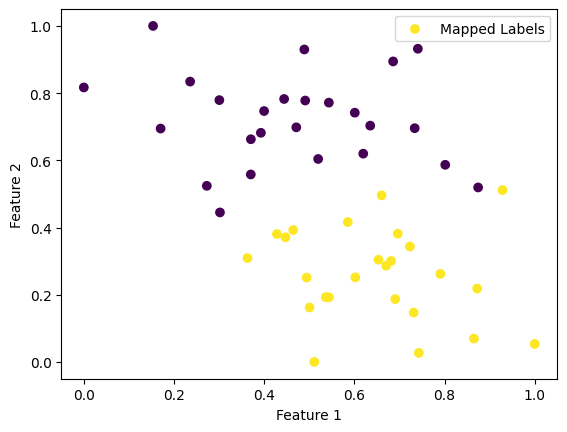

In [59]:
# Scatter plot of scaled features and mapped labels
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', marker='o', label='Mapped Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Adaline algorithm on the lineary separable data

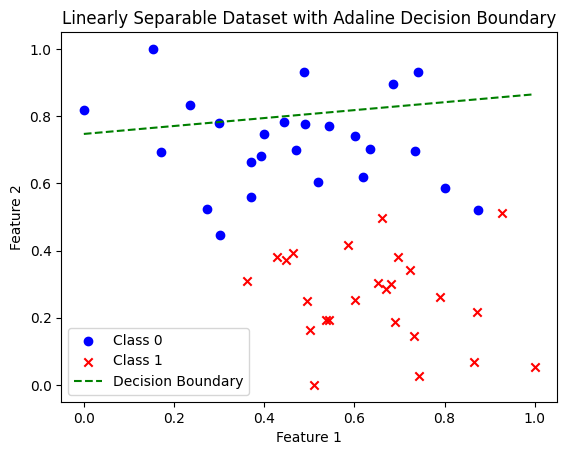

In [60]:
w_ad, b_ad = adaline(features, labels, r=0.01, epochs=300)


plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', marker='o', label='Class 0')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', marker='x', label='Class 1')

# Plot the decision boundary
x_decision_boundary = np.linspace(features[:, 0].min(), features[:, 0].max(), 100)
y_decision_boundary = (-w_ad[0] * x_decision_boundary - b_ad) / w_ad[1]
plt.plot(x_decision_boundary, y_decision_boundary, color='green', linestyle='dashed', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset with Adaline Decision Boundary')
plt.legend()
plt.show()
 

In [61]:
w_ad,b_ad

(array([ 0.18226365, -1.54329752]), 1.152824236479338)

In [62]:
y_pred_adaline = np.where(np.dot(features, w_ad) + b_ad >= 0, 1, 0)
y_pred_adaline

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [63]:
conf_matrix = confusion_matrix(labels, y_pred_adaline)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 6 19]
 [ 0 25]]


In [64]:
# Evaluation Metrics
accuracy = accuracy_score(labels, y_pred_adaline)
precision = precision_score(labels, y_pred_adaline)
recall = recall_score(labels, y_pred_adaline)
f1 = f1_score(labels, y_pred_adaline)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Metrics:
Accuracy: 0.62
Precision: 0.5681818181818182
Recall: 1.0
F1 Score: 0.7246376811594203


# Perceptron algorithm on the lineary separable data

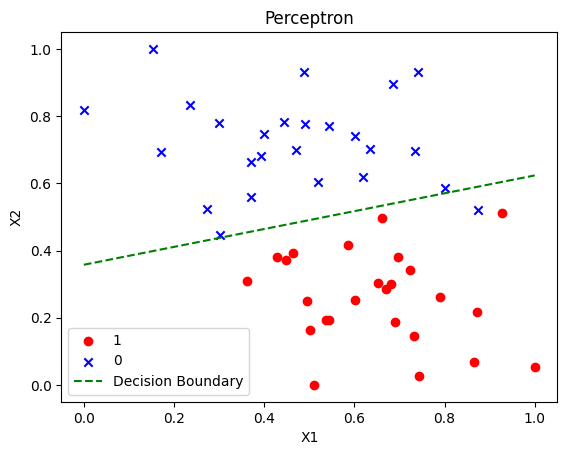

In [65]:
w_p, b_p = perceptron_alg(features, labels, r=0.1, epochs=100)

# Plot the XOR dataset
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', marker='o', label='1')
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', marker='x', label='0')

# Plot the decision boundary
x_decision_boundary = np.linspace(features[:, 0].min(), features[:, 0].max(), 100)
y_decision_boundary = (-w_p[0] * x_decision_boundary - b_p) / w_p[1]
plt.plot(x_decision_boundary, y_decision_boundary, color='green', linestyle='dashed', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron')
plt.legend()
plt.show()

In [66]:
y_pred_perceptron = np.where(np.dot(features, w_p) + b_p >= 0, 1, 0)
y_pred_perceptron

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [67]:
conf_matrix = confusion_matrix(labels, y_pred_perceptron)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[24  1]
 [ 0 25]]


In [68]:
# Evaluation Metrics
accuracy = accuracy_score(labels, y_pred_perceptron)
precision = precision_score(labels, y_pred_perceptron)
recall = recall_score(labels, y_pred_perceptron)
f1 = f1_score(labels, y_pred_perceptron)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Metrics:
Accuracy: 0.98
Precision: 0.9615384615384616
Recall: 1.0
F1 Score: 0.9803921568627451
